# SVM Implmentation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# fetch datasets
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
parkinsons = fetch_ucirepo(id=174) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

In [12]:
# # Function to train and evaluate model
def train_evaluate_model(X, y, test_size, split_name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    print("SVM Training...")
    model = SVC(kernel='rbf', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)
    
    print(f"\n {split_name} Split (Train: {100-test_size*100}% Test: {test_size*100}%)")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format="d")
    plt.title(f'Confusion Matrix - {split_name} Split')
    plt.show()
    
    return accuracy

# splits = {
#     "70-30": 0.3,
#     "80-20": 0.2,
#     "50-50": 0.5
# }
# def train_and_evaluate_svm(X, y, test_size, split_name):
#     print(f"\nTraining with {split_name} split")

#     # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#     # Standardize features
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     # Initialize and train SVM
#     svm_model = SVC(kernel='linear', C=1)
#     svm_model.fit(X_train, y_train)

#     # Test set evaluation
#     y_pred = svm_model.predict(X_test)
#     test_accuracy = accuracy_score(y_test, y_pred)
#     print(f"Test Set Accuracy for {split_name} split: {test_accuracy:.4f}")
#     return test_accuracy

splits = {
    "70-30": 0.3,
    "80-20": 0.2,
    "50-50": 0.5
}



### Dataset 1: Human Activity Recognition Using Smartphones Dataset


(253680, 21) (253680, 1)
SVM Training...
0.8624251024913276

 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     65605
           1       0.56      0.01      0.02     10499

    accuracy                           0.86     76104
   macro avg       0.71      0.51      0.48     76104
weighted avg       0.82      0.86      0.80     76104



<Figure size 800x600 with 0 Axes>

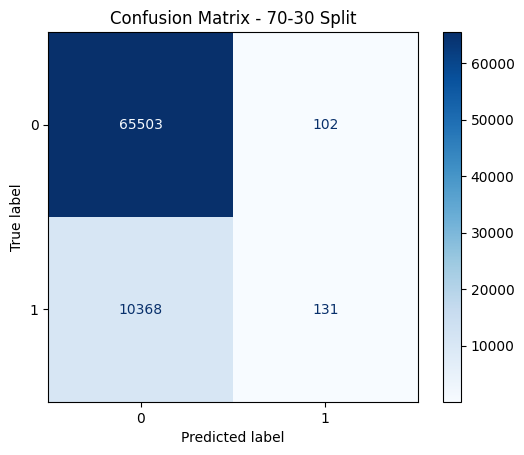

SVM Training...
0.8627798801639861

 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     43739
           1       0.61      0.01      0.03      6997

    accuracy                           0.86     50736
   macro avg       0.73      0.51      0.48     50736
weighted avg       0.83      0.86      0.80     50736



<Figure size 800x600 with 0 Axes>

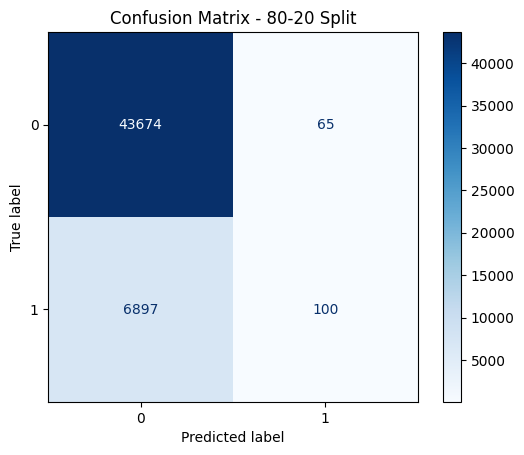

SVM Training...
0.8618416903185115

 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93    109241
           1       0.60      0.01      0.03     17599

    accuracy                           0.86    126840
   macro avg       0.73      0.51      0.48    126840
weighted avg       0.83      0.86      0.80    126840



<Figure size 800x600 with 0 Axes>

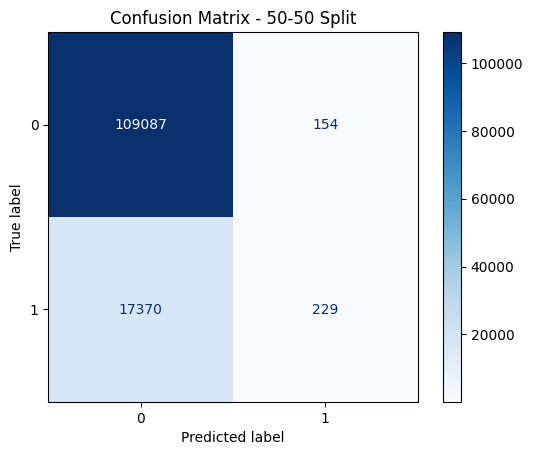

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

In [ ]:
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets
print(X.shape, y.shape)
y = y.values.ravel()

results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")

### Dataset 2: 

SVM Training...
0.8818897637795275

 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.81      0.86       518
    Osmancik       0.86      0.94      0.90       625

    accuracy                           0.88      1143
   macro avg       0.89      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143



c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 800x600 with 0 Axes>

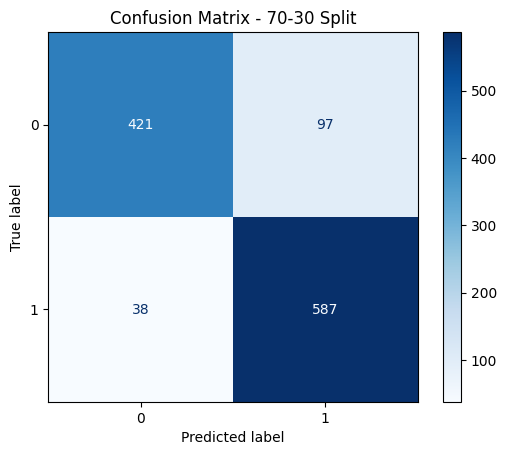

SVM Training...
0.8792650918635171

 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.91      0.82      0.86       350
    Osmancik       0.86      0.93      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.87      0.88       762
weighted avg       0.88      0.88      0.88       762



c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 800x600 with 0 Axes>

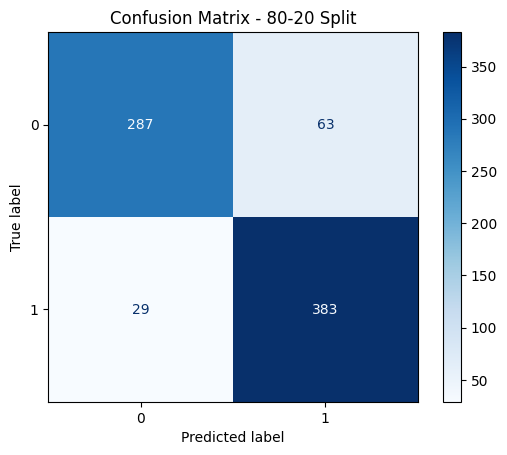

SVM Training...


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8834645669291339

 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.80      0.86       831
    Osmancik       0.86      0.95      0.90      1074

    accuracy                           0.88      1905
   macro avg       0.89      0.87      0.88      1905
weighted avg       0.89      0.88      0.88      1905



<Figure size 800x600 with 0 Axes>

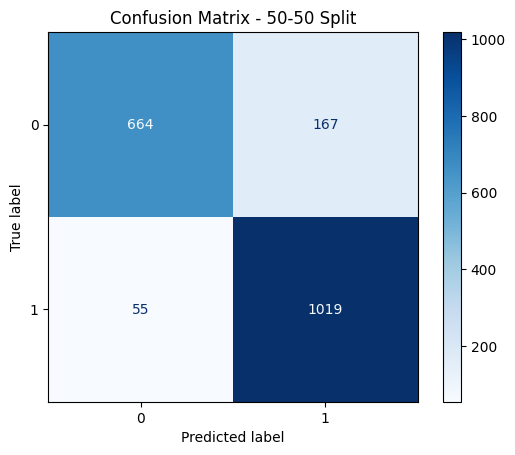


 Summary of Results
70-30 split accuracy: 0.88
80-20 split accuracy: 0.88
50-50 split accuracy: 0.88
Average Accuracy: 0.88


In [14]:
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")

### Dataset 3: 